In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [7]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [9]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [10]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


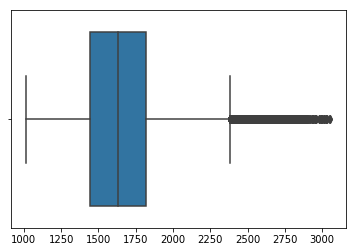

In [13]:
sns.boxplot(df.values)
# в принципе, можно это пропустит

In [14]:
df['DUQ_MW'].isnull().sum()

0

Пропусков в данных не обнаружено

Text(0, 0.5, 'МВт')

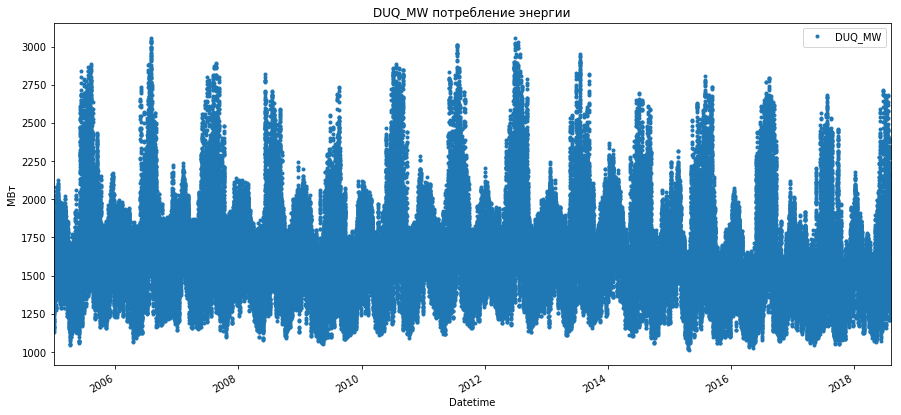

In [17]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Первичный анализ показывает, что:
- Пропусков нет
- Наличествует цикличность
- Никаких аномалий не обнаружено

## 2. Прочитайте базу Brent и сделайте ее перрасчет (ресемплинг) в представление по неделям, по месяцам

In [18]:
brent_df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [19]:
brent_df.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [21]:
brent_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [22]:
brent_df.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


Text(0, 0.5, 'USD')

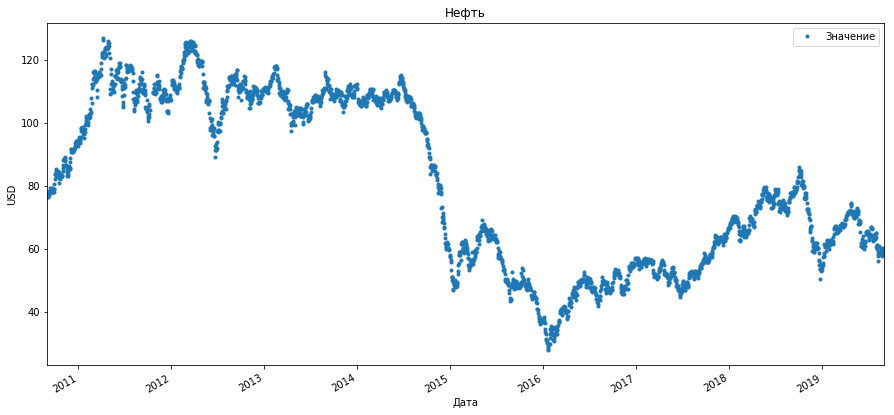

In [28]:
brent_df.plot( style = '.', figsize = ( 15, 7 ), title = 'Нефть' )
plt.ylabel('USD')

In [27]:
brent_df[brent_df['Значение'].isnull()].count()

Значение    0
dtype: int64

Пропусков не обнаружено.

Данные не выглядят цикличными.

In [62]:
w_brent_df = brent_df.resample('W').mean()
w_brent_df_std = brent_df.resample('W').std()

In [65]:
w_brent_df.head(10)

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
2010-10-10,84.146667
2010-10-17,83.498333
2010-10-24,82.795000
2010-10-31,83.361667


In [66]:
m_brent_df = brent_df.resample('M').mean()
m_brent_df_std = brent_df.resample('M').std()

In [50]:
m_brent_df.head(10)

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
2011-02-28,104.451250
2011-03-31,114.811538
2011-04-30,123.197826
2011-05-31,114.345385


## 3. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0, 0.5, 'USD')

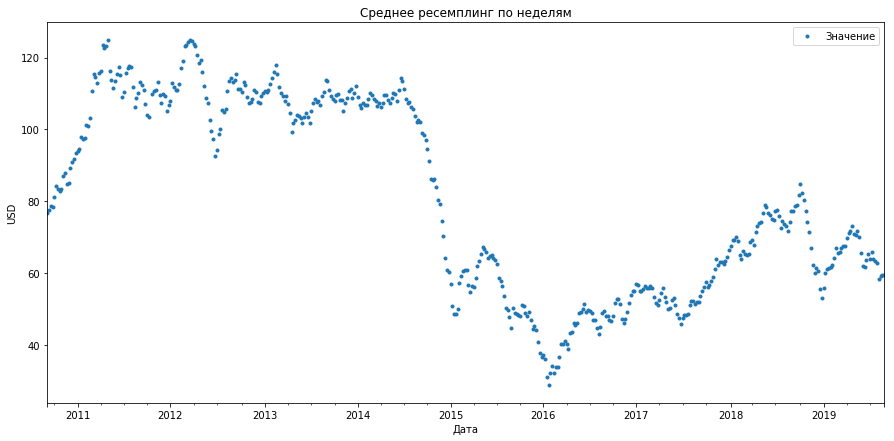

In [79]:
w_brent_df.plot( style = '.', figsize = ( 15, 7 ), title = 'Среднее ресемплинг по неделям' )
plt.ylabel('USD')

Text(0, 0.5, 'USD')

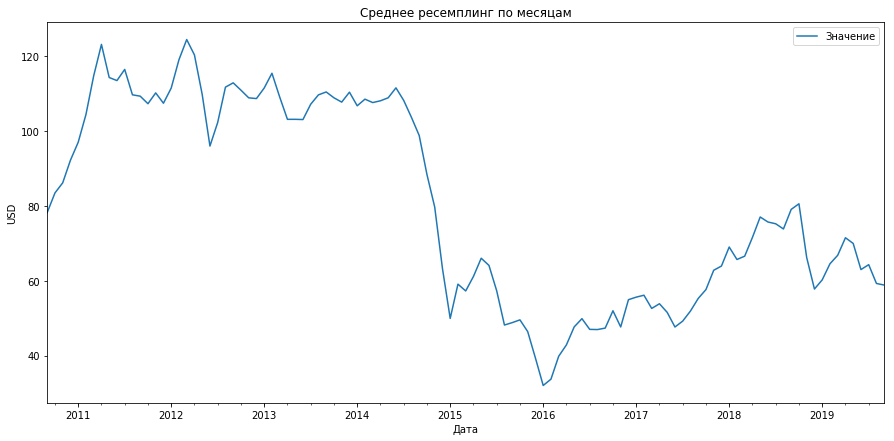

In [76]:
m_brent_df.plot(figsize = ( 15, 7 ), title = 'Среднее ресемплинг по месяцам' )
plt.ylabel('USD')

Text(0, 0.5, 'USD')

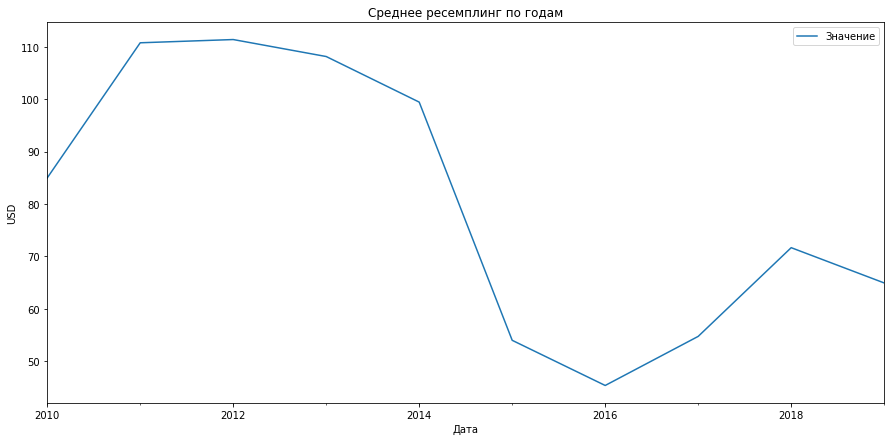

In [81]:
y_brent_df = brent_df.resample('Y').mean()
y_brent_std = brent_df.resample('Y').std()

y_brent_df.plot(figsize = ( 15, 7 ), title = 'Среднее ресемплинг по годам' )
plt.ylabel('USD')

Text(0, 0.5, 'USD')

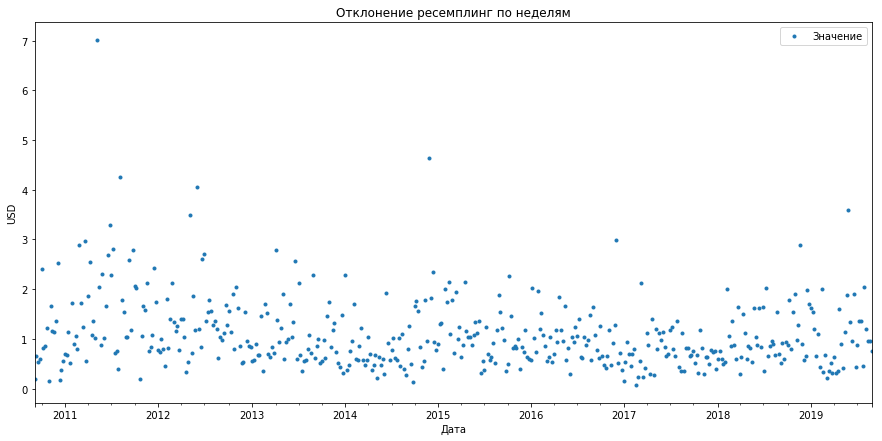

In [71]:
w_brent_df_std.plot( style = '.', figsize = ( 15, 7 ), title = 'Отклонение ресемплинг по неделям' )
plt.ylabel('USD')

Text(0, 0.5, 'USD')

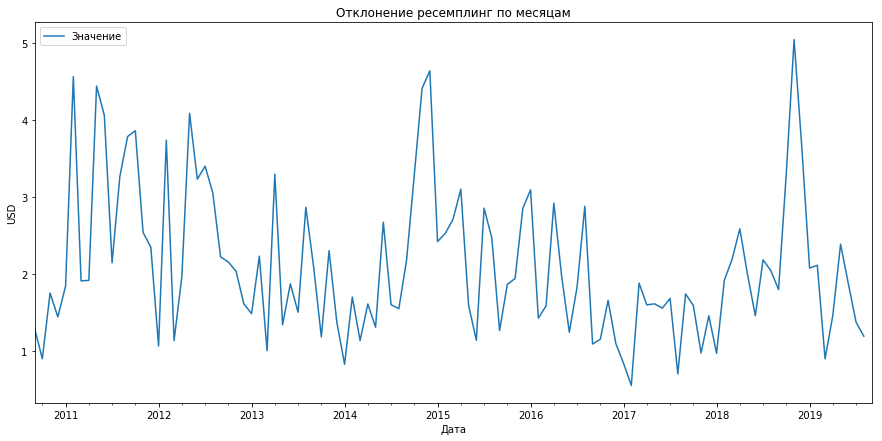

In [75]:
m_brent_df_std.plot(  figsize = ( 15, 7 ), title = 'Отклонение ресемплинг по месяцам' )
plt.ylabel('USD')

Text(0, 0.5, 'USD')

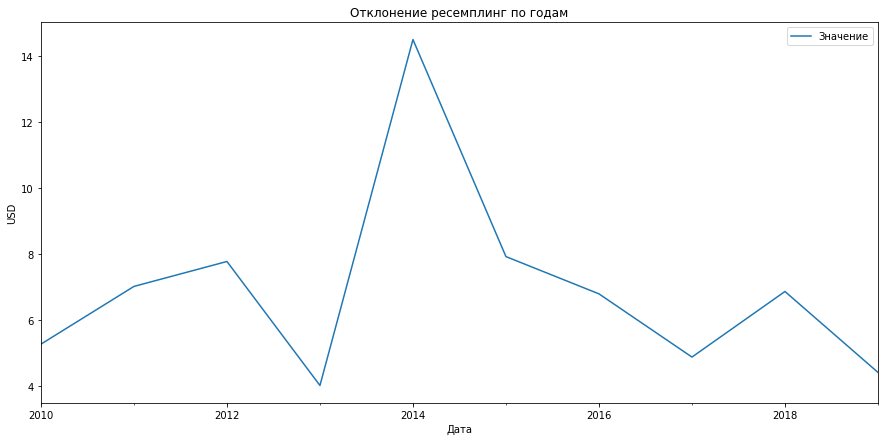

In [83]:
y_brent_std.plot(  figsize = ( 15, 7 ), title = 'Отклонение ресемплинг по годам' )
plt.ylabel('USD')

## Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Значительных изменений в поведении цены на недельном и месячном графиках в отличии от дневного не обнаружено.
Безусловно, на месячных интервалах мы не сможем увидеть мелкие колебания цен в течении недели, но для обего анализа это не столь критично (хотя, зависят от цели)